<a href="https://colab.research.google.com/github/afujii/class/blob/main/rdf%E5%A4%96%E9%83%A8%E5%8F%82%E7%85%A7%E3%81%A8%E5%8F%AF%E8%A6%96%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBpedia の　RDF形式情報の扱い
DBpedia から得られる情報を　単純な HTTP request/response ではなく、SPARQLクエリに対する応答として処理するため、python のWrapperを用意する。

In [ ]:
!pip install rdflib
!pip install SPARQLWrapper
!pip install pydotplus
!pip install graphviz

     |████████████████████████████████| 379 kB 6.0 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 


In [ ]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))


In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON, XML

sparql = SPARQLWrapper("http://ja.dbpedia.org/sparql")
sparql.setQuery("""
PREFIX dbpj: <http://ja.dbpedia.org/resource/>
PREFIX dbp-owl: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?film_name
WHERE
{
 ?film dbp-owl:director dbpj:ビートたけし;
 dbp-owl:starring dbpj:ビートたけし;
 rdfs:label ?film_name.}
""")
sparql.setReturnFormat(JSON)

results = sparql.query().convert()

labels = list()
for result in results["results"]["bindings"]:
    print(result["film_name"]["value"])



In [ ]:
### rdflib でパースする。
from rdflib import Graph
sparql.setReturnFormat('n3')
results = sparql.query().convert()
g = Graph()
g.parse(data=results, format='n3')
# n3 フォーマット以外では、「ビートたけし」の例は、うまく動作しない。

/usr/local/lib/python3.7/dist-packages/SPARQLWrapper/Wrapper.py:967: RuntimeWarning: Sending Accept header '*/*' because unexpected returned format 'n3' in a 'SELECT' SPARQL query form
  warnings.warn("Sending Accept header '*/*' because unexpected returned format '%s' in a '%s' SPARQL query form" % (self.returnFormat, self.queryType), RuntimeWarning)


<Graph identifier=Na6969b4faacd4cb7a4cb8b96a5f12973 (<class 'rdflib.graph.Graph'>)>

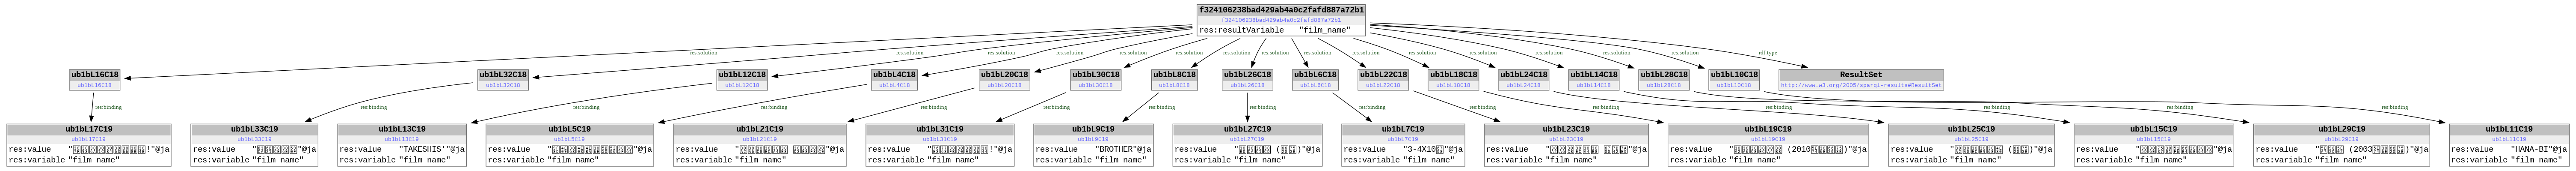

In [ ]:
visualize(g)